In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read in Data

In [2]:
cr = pd.read_csv('data/credit_record.csv')
cr.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [3]:
cr.size

3145725

In [4]:
for column in cr.columns:
    print(f"{column} has {cr[column].isna().sum()} null values")

ID has 0 null values
MONTHS_BALANCE has 0 null values
STATUS has 0 null values


In [5]:
ar = pd.read_csv('data/application_record.csv')
ar.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [6]:
ar.size

7894026

In [7]:
for column in ar.columns:
    print(f"{column} has {ar[column].isna().sum()} null values")

ID has 0 null values
CODE_GENDER has 0 null values
FLAG_OWN_CAR has 0 null values
FLAG_OWN_REALTY has 0 null values
CNT_CHILDREN has 0 null values
AMT_INCOME_TOTAL has 0 null values
NAME_INCOME_TYPE has 0 null values
NAME_EDUCATION_TYPE has 0 null values
NAME_FAMILY_STATUS has 0 null values
NAME_HOUSING_TYPE has 0 null values
DAYS_BIRTH has 0 null values
DAYS_EMPLOYED has 0 null values
FLAG_MOBIL has 0 null values
FLAG_WORK_PHONE has 0 null values
FLAG_PHONE has 0 null values
FLAG_EMAIL has 0 null values
OCCUPATION_TYPE has 134203 null values
CNT_FAM_MEMBERS has 0 null values


In [8]:
# Do we want Occupation Type to have any nulls? 
drop = True

if drop:
    ar = ar.dropna()

### Combine Data with Previous Month

In [9]:
crar = cr.merge(ar, how='inner', on='ID')
crar['MONTHS_BALANCE_PREV'] = crar['MONTHS_BALANCE'] - 1
crar.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE_PREV
0,5008806,0,C,M,Y,Y,0,112500.0,Working,Secondary / secondary special,...,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-1
1,5008806,-1,C,M,Y,Y,0,112500.0,Working,Secondary / secondary special,...,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-2
2,5008806,-2,C,M,Y,Y,0,112500.0,Working,Secondary / secondary special,...,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-3
3,5008806,-3,C,M,Y,Y,0,112500.0,Working,Secondary / secondary special,...,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-4
4,5008806,-4,C,M,Y,Y,0,112500.0,Working,Secondary / secondary special,...,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-5


In [10]:
cr_prev = cr.copy()
cr_prev.columns = ['ID', 'MONTHS_BALANCE_PREV', 'STATUS_PREV']

crar_prev = crar.merge(cr_prev, how='inner', on = ['ID', 'MONTHS_BALANCE_PREV'])

### Check out Merge

In [11]:
crar_prev[['ID', 'MONTHS_BALANCE', 'MONTHS_BALANCE_PREV', 'STATUS', 'STATUS_PREV']].head(15)

,ID,MONTHS_BALANCE,MONTHS_BALANCE_PREV,STATUS,STATUS_PREV
0,5008806,0,-1,C,C
1,5008806,-1,-2,C,C
2,5008806,-2,-3,C,C
3,5008806,-3,-4,C,C
4,5008806,-4,-5,C,C
5,5008806,-5,-6,C,C
6,5008806,-6,-7,C,X
7,5008806,-7,-8,X,0
8,5008806,-8,-9,0,0
9,5008806,-9,-10,0,X


In [12]:
t = '''
 Previous |  Current  |   Paid   |
-----------------------------------
          |    X/C    |     Y    |
    0     |     =     |     Y    |
          |     >     |     N    |
-----------------------------------
          |   X/C/0   |     Y    |
    1     |     =     |     Y    |
          |     >     |     N    |
-----------------------------------
          |   X/C/0   |     Y    |
    2     |     =     |     Y    |
          |     >     |     N    |
-----------------------------------

....

-----------------------------------
          |   X/C/0   |     Y    |
    X     |     =     |     Y    |
          |     >     |     N    |
-----------------------------------
    C     |     =     | Y or Del |
-----------------------------------
'''

crar_prev.groupby(['STATUS_PREV', 'STATUS']).size()

STATUS_PREV  STATUS
0            0         167542
             1           4083
             2             59
             3              6
             4              1
             5             30
             C          10420
             X          12954
1            0           3035
             1           2011
             2            356
             3              4
             C            614
             X            200
2            0            135
             1             86
             2             85
             3            157
             4              6
             C             36
             X             25
3            0             16
             1              6
             2             10
             3              8
             4            121
             5              1
             C             12
             X              4
4            0              5
             2              3
             3              2
             4      

### Process Data - Categorical Variables

__Main Transformed Predictors:__

NAME_INCOME_TYPE

    - DELETE?? - Don't understand
    
NAME_EDUCATION_TYPE

    - College vs Not College
        1. Higher education + Academic degree
        2. Secondary / secondary special + Incomplete higher + Lower secondary

NAME_FAMILY_STATUS

    - Two Groups: Married vs Not Married
        1. Married + Civil marriage
        2. Single / not married + Separated + Widow
    - Three Groups Married vs Never Married vs Previously Married
        1. Married + Civil marriage
        2. Single / not married
        3. Separated + Widow

NAME_HOUSING_TYPE

    - Two groups: Paying vs Not Paying
        1. House / apartment + Rented apartment + Office apartment + Co-op apartment
        2. With parents + Municipal apartment

OCCUPATION_TYPE

    - Two groups: White vs Blue Collar
        1. Accountants + Core staff + HR staff + High skill tech staff + IT staff + 
           Managers + Medicine staff + Realty agents + Sales staff + Secretaries
        2. Cleaning staff + Cooking staff + Drivers + Laborers + Low-skill Laborers + 
           Private service staff + Security staff + Waiters/barmen staff
    - Try to keep as is as well

In [13]:
df_clean = crar_prev.copy()

In [14]:
# Income Type
df_clean = df_clean.drop('NAME_INCOME_TYPE', axis=1)

In [15]:
# Education Type
if 'NAME_EDUCATION_TYPE' in df_clean.columns:

    df_clean['College_Education'] = np.where(
        df_clean['NAME_EDUCATION_TYPE'].isin(['Higher education', 'Academic degree']), 
        True, False
    )

    print(df_clean.groupby(['College_Education', 'NAME_EDUCATION_TYPE']).size())

    df_clean = df_clean.drop('NAME_EDUCATION_TYPE', axis=1)

College_Education  NAME_EDUCATION_TYPE          
False              Incomplete higher                 19597
                   Lower secondary                    4369
                   Secondary / secondary special    341509
True               Academic degree                     420
                   Higher education                 146638
dtype: int64


In [16]:
# Education Type
if 'NAME_EDUCATION_TYPE' in df_clean.columns:

    df_clean['College_Education'] = np.where(
        df_clean['NAME_EDUCATION_TYPE'].isin(['Higher education', 'Academic degree']), 
        True, False
    )

    print(df_clean.groupby(['College_Education', 'NAME_EDUCATION_TYPE']).size())

    df_clean = df_clean.drop('NAME_EDUCATION_TYPE', axis=1)

In [17]:
# Family Status
if 'NAME_FAMILY_STATUS' in df_clean.columns:
    
    df_clean['Currently_Married'] = np.where(
        df_clean['NAME_FAMILY_STATUS'].isin(['Married', 'Civil marriage']), 
        True, False
    )

    print(df_clean.groupby(['Currently_Married', 'NAME_FAMILY_STATUS']).size())
    
    print('\n----------\n')
    
    df_clean['Marriage_Status'] = 'Single'
    df_clean.loc[df_clean['Currently_Married'] == True, 'Marriage_Status'] = 'Married'
    df_clean.loc[df_clean['NAME_FAMILY_STATUS'].isin(['Separated', 'Widow']), 'Marriage_Status'] = 'Previously Married'

    print(df_clean.groupby(['Marriage_Status', 'NAME_FAMILY_STATUS']).size())

    df_clean = df_clean.drop('NAME_FAMILY_STATUS', axis=1)

Currently_Married  NAME_FAMILY_STATUS  
False              Separated                29927
                   Single / not married     62499
                   Widow                    11663
True               Civil marriage           41950
                   Married                 366494
dtype: int64

----------

Marriage_Status     NAME_FAMILY_STATUS  
Married             Civil marriage           41950
                    Married                 366494
Previously Married  Separated                29927
                    Widow                    11663
Single              Single / not married     62499
dtype: int64


In [18]:
# Housing Type
if 'NAME_HOUSING_TYPE' in df_clean.columns:
    
    df_clean['Paying_Housing'] = np.where(
        df_clean['NAME_HOUSING_TYPE'].isin(['House / apartment', 'Rented apartment', 'Office apartment', 'Co-op apartment']), 
        True, False
    )

    print(df_clean.groupby(['Paying_Housing', 'NAME_HOUSING_TYPE']).size())

    df_clean = df_clean.drop('NAME_HOUSING_TYPE', axis=1)

Paying_Housing  NAME_HOUSING_TYPE  
False           Municipal apartment     17211
                With parents            27921
True            Co-op apartment          3244
                House / apartment      452075
                Office apartment         3960
                Rented apartment         8122
dtype: int64


In [19]:
# Occupation Type
white_collar_jobs = [
    'Core staff', 'Sales staff', 'Managers', 'High skill tech staff', 'Accountants', 
    'Medicine staff', 'Secretaries', 'HR staff', 'IT staff', 'Realty agents'
]

df_clean['White_Collar'] = np.where(
    df_clean['OCCUPATION_TYPE'].isin(white_collar_jobs), 
    True, False
)

print(df_clean.groupby(['White_Collar', 'OCCUPATION_TYPE']).size())

White_Collar  OCCUPATION_TYPE      
False         Cleaning staff            10848
              Cooking staff             12761
              Drivers                   45540
              Laborers                 125361
              Low-skill Laborers         3448
              Private service staff      6370
              Security staff            11808
              Waiters/barmen staff       2383
True          Accountants               25982
              Core staff                73521
              HR staff                   1601
              High skill tech staff     30385
              IT staff                   1259
              Managers                  64726
              Medicine staff            25484
              Realty agents              1181
              Sales staff               66877
              Secretaries                2998
dtype: int64


In [20]:
df_clean[df_clean.columns[:12]].head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE
0,5008806,0,C,M,Y,Y,0,112500.0,-21474,-1134,1,0
1,5008806,-1,C,M,Y,Y,0,112500.0,-21474,-1134,1,0
2,5008806,-2,C,M,Y,Y,0,112500.0,-21474,-1134,1,0
3,5008806,-3,C,M,Y,Y,0,112500.0,-21474,-1134,1,0
4,5008806,-4,C,M,Y,Y,0,112500.0,-21474,-1134,1,0


In [21]:
df_clean[df_clean.columns[12:24]].head()

,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE_PREV,STATUS_PREV,College_Education,Currently_Married,Marriage_Status,Paying_Housing,White_Collar
0,0,0,Security staff,2.0,-1,C,False,True,Married,True,False
1,0,0,Security staff,2.0,-2,C,False,True,Married,True,False
2,0,0,Security staff,2.0,-3,C,False,True,Married,True,False
3,0,0,Security staff,2.0,-4,C,False,True,Married,True,False
4,0,0,Security staff,2.0,-5,C,False,True,Married,True,False


In [22]:
#from decimal import ROUND_DOWN

from numpy import floor
from regex import D


#floor(df_clean["DAYS_BIRTH"]/-365)
df_clean['AGE_YR'] = floor(df_clean["DAYS_BIRTH"]/-365)
df_clean['YRS_WORKED'] = floor(df_clean['DAYS_EMPLOYED']/-365)
df_clean['FLAG_OWN_CAR'] = pd.Series(np.where(df_clean.FLAG_OWN_CAR.values == 'Y', True, False),
          df_clean.index)
df_clean['FLAG_OWN_REALTY'] = pd.Series(np.where(df_clean.FLAG_OWN_REALTY.values == 'Y', True, False),
          df_clean.index)
#df_clean

In [24]:
df_clean.drop(columns=['DAYS_EMPLOYED', 'DAYS_BIRTH', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', "FLAG_EMAIL", 'CNT_FAM_MEMBERS'], inplace=True)


In [25]:
df_clean

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,OCCUPATION_TYPE,MONTHS_BALANCE_PREV,STATUS_PREV,College_Education,Currently_Married,Marriage_Status,Paying_Housing,White_Collar,AGE_YR,YRS_WORKED
0,5008806,0,C,M,True,True,0,112500.0,Security staff,-1,C,False,True,Married,True,False,58.0,3.0
1,5008806,-1,C,M,True,True,0,112500.0,Security staff,-2,C,False,True,Married,True,False,58.0,3.0
2,5008806,-2,C,M,True,True,0,112500.0,Security staff,-3,C,False,True,Married,True,False,58.0,3.0
3,5008806,-3,C,M,True,True,0,112500.0,Security staff,-4,C,False,True,Married,True,False,58.0,3.0
4,5008806,-4,C,M,True,True,0,112500.0,Security staff,-5,C,False,True,Married,True,False,58.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512528,5150487,-24,C,M,True,False,0,202500.0,Drivers,-25,C,False,True,Married,True,False,53.0,5.0
512529,5150487,-25,C,M,True,False,0,202500.0,Drivers,-26,C,False,True,Married,True,False,53.0,5.0
512530,5150487,-26,C,M,True,False,0,202500.0,Drivers,-27,C,False,True,Married,True,False,53.0,5.0
512531,5150487,-27,C,M,True,False,0,202500.0,Drivers,-28,C,False,True,Married,True,False,53.0,5.0


# Calculating Descriptive Statistics Based on Population Surveyed

First, I create a table that looks at each individual only once.

In [26]:
population_info = df_clean.drop_duplicates(subset = ['ID'])

Next, we are going to look at some of the descriptive statistics for this dataset, including gender breakdown, income distribution, age distribution, family size, etc.

<AxesSubplot:title={'center':'Distribution of Income'}, ylabel='Frequency'>

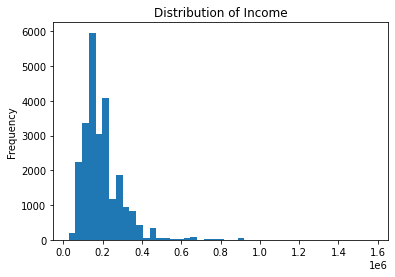

In [27]:
population_info.AMT_INCOME_TOTAL.plot.hist(bins=45, title="Distribution of Income")

In [29]:
population_info['CODE_GENDER'].value_counts()

F    15492
M     9406
Name: CODE_GENDER, dtype: int64

# Create Variable

In [30]:
#Drop all instances of Status C -> Status C (No debt taken on or paid off)
df_clean.drop(df_clean[(df_clean.STATUS == 'C') & (df_clean.STATUS_PREV == 'C')].index, inplace=True)


In [31]:
df_clean['target'] = 'Paid'
df_clean.loc[(
        (df_clean['STATUS_PREV'].isin(['X', '0'])) & (df_clean['STATUS'].isin(['1', '2', '3', '4', '5']))) |
        (df_clean['STATUS_PREV'] == '1') & (df_clean['STATUS'].isin(['2', '3', '4', '5'])) |
        (df_clean['STATUS_PREV'] == '2') & (df_clean['STATUS'].isin(['3', '4', '5'])) |
        (df_clean['STATUS_PREV'] == '3') & (df_clean['STATUS'].isin(['4', '5'])) |
        (df_clean['STATUS_PREV'].isin(['4', '5'])) & (df_clean['STATUS'] == '5')
    , 'target'] = 'Not Paid'

In [32]:
df_clean[['STATUS', 'STATUS_PREV', 'target']]
df_clean.target.value_counts()

Paid        292529
Not Paid      6138
Name: target, dtype: int64

In [33]:
df_clean[df_clean['target']== 'Not Paid'].groupby("STATUS").count()

df_clean.drop(columns=['ID','MONTHS_BALANCE', 'MONTHS_BALANCE_PREV'])

,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,OCCUPATION_TYPE,STATUS_PREV,College_Education,Currently_Married,Marriage_Status,Paying_Housing,White_Collar,AGE_YR,YRS_WORKED,target
6,C,M,True,True,0,112500.0,Security staff,X,False,True,Married,True,False,58.0,3.0,Paid
7,X,M,True,True,0,112500.0,Security staff,0,False,True,Married,True,False,58.0,3.0,Paid
8,0,M,True,True,0,112500.0,Security staff,0,False,True,Married,True,False,58.0,3.0,Paid
9,0,M,True,True,0,112500.0,Security staff,X,False,True,Married,True,False,58.0,3.0,Paid
10,X,M,True,True,0,112500.0,Security staff,0,False,True,Married,True,False,58.0,3.0,Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512499,0,F,True,True,1,157500.0,Core staff,0,False,True,Married,True,True,29.0,4.0,Paid
512500,0,F,True,True,1,157500.0,Core staff,0,False,True,Married,True,True,29.0,4.0,Paid
512501,0,F,True,True,1,157500.0,Core staff,0,False,True,Married,True,True,29.0,4.0,Paid
512502,0,F,True,True,1,157500.0,Core staff,0,False,True,Married,True,True,29.0,4.0,Paid
